In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature

import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
path = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged2/'

In [5]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged2/cores_gt15000km2_table_AMSRE_tracking2_17_init.csv', na_values=-999)

##  Wet / Dry case comparison

Wet: Day 0 / Day -1 > + 0.01% SM anomaly mean (more like 'neutral & wet condition')

Dry: Day  0 < -3% , Day-1 < -1.5% SM anomaly mean

Identified in box + - 90 km and 200km upstream from core centre

In [6]:
msgopen.shape

(9532, 30)

In [7]:
print('Number of ALL cases:', msgopen.shape[0])

Number of ALL cases: 9532


In [8]:
alls = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5)  & (msgopen['dtime']<=2)]

In [9]:
topo = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5) & (msgopen['topo']<=450) & (msgopen['dtime']<=2)]

In [10]:
1-len(topo)/len(alls)

0.2333371837819106

In [11]:
#dry = msgopen[(msgopen['SMmean0']<-3)& (msgopen['SMmean-1'] <-1.5) &(msgopen['SMmean0']>-900)& (msgopen['SMmean-1'] >-900) ]
msgopen = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5) & (msgopen['topo']<=450) & (msgopen['dtime']<=2)]##  & (msgopen['ERAqmean']>14.8) & (msgopen['ERAqmean']<16.5)]

In [12]:
len(msgopen)

6637

In [13]:
np.min(msgopen['lat'])

10.278089448606256

In [14]:
#propagating:
len(msgopen[(msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)])

4446

In [15]:
#propagation filter
propagation = msgopen[((msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5))]

In [16]:
alls = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5)  & (msgopen['dtime']<=2) & ((msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5))]

In [17]:
topo = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5)  & (msgopen['dtime']<=2) & ((msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)) & (msgopen['topo']<=450)]

In [18]:
1-len(topo)/len(alls)

0.0

In [19]:
#SM filter
propagation = propagation[np.isfinite(propagation['SMmean0'])]

In [20]:
len(propagation)

4365

In [21]:
#Centiles of SMA without day-1 filter, representative of histogram filter
print(np.percentile(propagation['SMmean0'], [10,90]))
print(np.percentile(propagation['SMmean0'], [25,75]))

[-6.90545539  1.60460351]
[-4.56303636 -0.39557092]


(array([ 474.,    0.,    0.,  969.,    0.,    0., 1788.,    0.,    0.,
        1134.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 10 artists>)

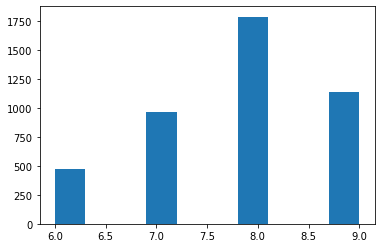

In [22]:
plt.hist(propagation['month'])

(array([699., 821., 710., 697., 476., 303., 305., 211.,  98.,  45.]),
 array([10.27808945, 11.19012577, 12.10216208, 13.0141984 , 13.92623472,
        14.83827103, 15.75030735, 16.66234366, 17.57437998, 18.4864163 ,
        19.39845261]),
 <BarContainer object of 10 artists>)

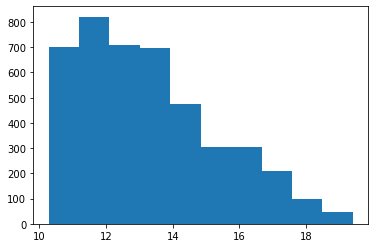

In [23]:
plt.hist(propagation['lat'])

(array([ 67.,  88., 104., 150., 323., 735., 871., 706., 360., 285.]),
 array([14.  , 14.21, 14.42, 14.63, 14.84, 15.05, 15.26, 15.47, 15.68,
        15.89, 16.1 ]),
 <BarContainer object of 10 artists>)

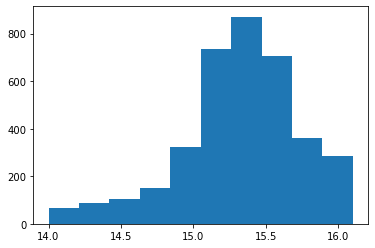

In [24]:
plt.hist(propagation['ERAqmean'], range=(14,16.1))

In [25]:
#including day-1 filter
len(propagation[np.isfinite(propagation['SMmean0']) & np.isfinite(propagation['SMmean-1'])])

2141

In [26]:
wetness = propagation[np.isfinite(propagation['SMmean0'])]# & np.isfinite(propagation['SMmean-1'])]

In [27]:
len(wetness)

4365

In [28]:
wetness['date'] = pd.to_datetime(wetness[['year','month','day']])

In [29]:
wetness.groupby('date')

In [30]:
uni, count = np.unique(wetness['date'], return_counts=True)

In [31]:
len(uni)

322

In [32]:
np.percentile(wetness['SMmean0'], [10,90])

array([-6.90545539,  1.60460351])

In [33]:
np.percentile(wetness['SMmean0'], [20,80])

array([-5.22949149,  0.15754101])

In [34]:
wetness

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,LSTAmean,LSTAslotfrac,dtime,ERAqmean,SMscale,initTime,xinit,yinit,xdiff,date
24,24,24,2006,6,5,17,-3.666952,10.278089,474,231,...,2.731977,1.000000,1.0,15.07,0.0,5.0,692.0,402.0,218.0,2006-06-05
25,25,25,2006,6,5,17,-3.891531,10.411511,466,236,...,2.696197,1.000000,1.0,15.07,0.0,5.0,692.0,402.0,226.0,2006-06-05
26,26,26,2006,6,5,17,-3.442373,10.589316,482,243,...,3.325430,1.000000,1.0,15.09,0.0,5.0,692.0,402.0,210.0,2006-06-05
27,27,27,2006,6,5,17,-3.622036,10.767017,476,249,...,3.353060,1.000000,0.0,15.06,0.0,5.0,692.0,402.0,216.0,2006-06-05
28,28,28,2006,6,5,17,-2.813552,10.855828,505,252,...,4.482429,1.000000,1.0,15.11,0.0,5.0,692.0,402.0,187.0,2006-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,9526,9526,2010,9,28,17,-5.957656,13.550746,394,348,...,-1.179445,0.057143,1.0,15.85,0.0,2.0,NaN,NaN,NaN,2010-09-28
9527,9527,9527,2010,9,28,17,-5.643245,13.814258,405,357,...,-0.849622,0.141558,0.0,15.68,0.0,2.0,NaN,NaN,NaN,2010-09-28
9528,9528,9528,2010,9,28,17,-5.912740,14.165138,396,369,...,-1.450397,0.120779,0.0,15.25,0.0,2.0,NaN,NaN,NaN,2010-09-28
9529,9529,9529,2010,9,28,17,-5.912740,14.252773,396,372,...,-1.823011,0.123377,0.0,15.11,0.0,2.0,NaN,NaN,NaN,2010-09-28


In [35]:
wetness.keys()

Index(['id', 'id.1', 'year', 'month', 'day', 'hour', 'lon', 'lat', 'xloc',
       'yloc', 'area', 'csize', 't', 'storm_id', 'topo', 'SMmean0', 'SMdry0',
       'SMwet0', 'SMmean-1', 'SMdry-1', 'SMwet-1', 'LSTAmean', 'LSTAslotfrac',
       'dtime', 'ERAqmean', 'SMscale', 'initTime', 'xinit', 'yinit', 'xdiff',
       'date'],
      dtype='object')

In [36]:
print(np.percentile(wetness['SMmean0'],[10,90]))
print(np.percentile(wetness['SMmean0'],[25,50,75]))
print(np.percentile(wetness['SMmean0'],[20,50,80]))

[-6.90545539  1.60460351]
[-4.56303636 -2.24824285 -0.39557092]
[-5.22949149 -2.24824285  0.15754101]


In [37]:
np.sum((wetness['SMmean0']<=-5.22))

876

In [38]:
np.sum((wetness['SMmean0']>=0.16))

873

In [39]:
dry = wetness[(wetness['SMmean0']<=-5.22)]#&(wetness['SMmean-1']<=-1.3)]
wet = wetness[(wetness['SMmean0']>=0.16)]# &(wetness['SMmean-1']>=-2)]

(array([  1.,   0.,   0.,   1.,   0.,   1.,   2.,   2.,   1.,   8.,  11.,
          7.,  10.,  10.,  20.,  15.,  46., 321., 306., 111.]),
 array([ 6.6  ,  7.089,  7.578,  8.067,  8.556,  9.045,  9.534, 10.023,
        10.512, 11.001, 11.49 , 11.979, 12.468, 12.957, 13.446, 13.935,
        14.424, 14.913, 15.402, 15.891, 16.38 ]),
 <BarContainer object of 20 artists>)

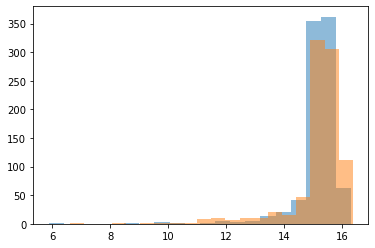

In [40]:
plt.hist(dry['ERAqmean'], alpha=0.5, bins=20)
plt.hist(wet['ERAqmean'], alpha=0.5, bins=20)

In [41]:
print('DRY', np.mean(dry['ERAqmean']))
print('WET', np.mean(wet['ERAqmean']))

DRY 15.140547945205475
WET 15.175349369988538


In [42]:
qwetness = wetness[(wetness['ERAqmean']>=14) ]#& (wetness['ERAqmean']<=15.75)]

In [43]:
len(qwetness)

3752

In [44]:
print(np.percentile(qwetness['SMmean0'],[10, 20,50,80,90]))

[-7.18696743 -5.48081442 -2.4276806   0.31461798  1.7959988 ]


In [45]:
np.sum((qwetness['SMmean0']<=-5.48))# &(qwetness['SMmean-1']<=-0.01))

752

In [46]:
drytest = qwetness[(qwetness['SMmean0']<=-5.48)]# &(qwetness['SMmean-1']<=-0.01)]

In [47]:
drytest['date'] = pd.to_datetime(drytest[['year','month','day']])

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
uni, count = np.unique(drytest['date'], return_counts=True)

In [49]:
count

array([17,  2,  1,  9,  2,  1,  5,  4, 18, 12, 18,  2,  4,  1,  3,  1,  3,
        3,  4,  2,  3,  3,  1, 11,  2,  7,  5,  5,  9, 12,  3,  1,  9,  3,
        1,  3,  1,  7,  1,  6,  2,  2,  1,  2,  1,  9,  1,  1,  2,  7,  2,
        1, 13, 19,  6,  2,  2,  6, 15, 11,  9,  2,  8,  3,  1,  1,  3,  3,
       16,  4,  1,  3,  3, 12,  5,  4,  2,  3,  5,  7,  4,  7,  3,  6, 11,
        2,  6,  7,  2,  4,  1,  9, 19,  4, 17,  6,  6,  1, 17,  1,  1, 10,
        4, 12,  4,  4,  2,  1,  4, 15,  2,  1,  3,  1,  1,  1, 16,  2,  1,
        1,  2, 11, 11,  2,  2,  8,  1,  5,  5,  3,  6,  4,  3, 17, 17,  1,
        8,  2,  1,  7,  6,  1,  1,  1,  3])

In [50]:
len(uni)

145

In [51]:
np.sum((qwetness['SMmean0']>=0.31))#& (qwetness['SMmean-1']>=-1))

753

In [52]:
wettest = qwetness[(qwetness['SMmean0']>=0.31)]#& (qwetness['SMmean-1']>=-1)]

In [53]:
wettest['date'] = pd.to_datetime(wettest[['year','month','day']])

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
len(np.unique(wettest['date']))

146

(array([ 88., 109., 127., 122., 114.,  92.,  44.,  35.,  17.,   5.]),
 array([10.27808945, 10.99291286, 11.70773627, 12.42255969, 13.1373831 ,
        13.85220651, 14.56702992, 15.28185334, 15.99667675, 16.71150016,
        17.42632357]),
 <BarContainer object of 10 artists>)

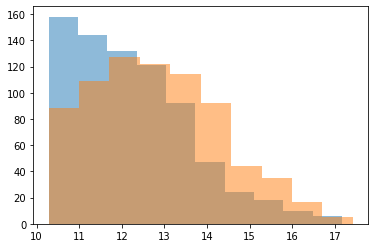

In [55]:
plt.hist(drytest['lat'], alpha=0.5)
plt.hist(wettest['lat'], alpha=0.5)

(array([  7.,   4.,   6.,  21.,  40.,  87., 184., 148.,  98., 102.]),
 array([14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. ]),
 <BarContainer object of 10 artists>)

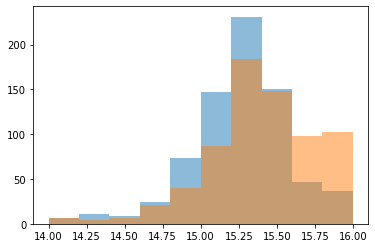

In [56]:
plt.hist(drytest['ERAqmean'], alpha=0.5, bins=10, range=(14,16))
plt.hist(wettest['ERAqmean'], alpha=0.5, bins=10, range=(14,16))

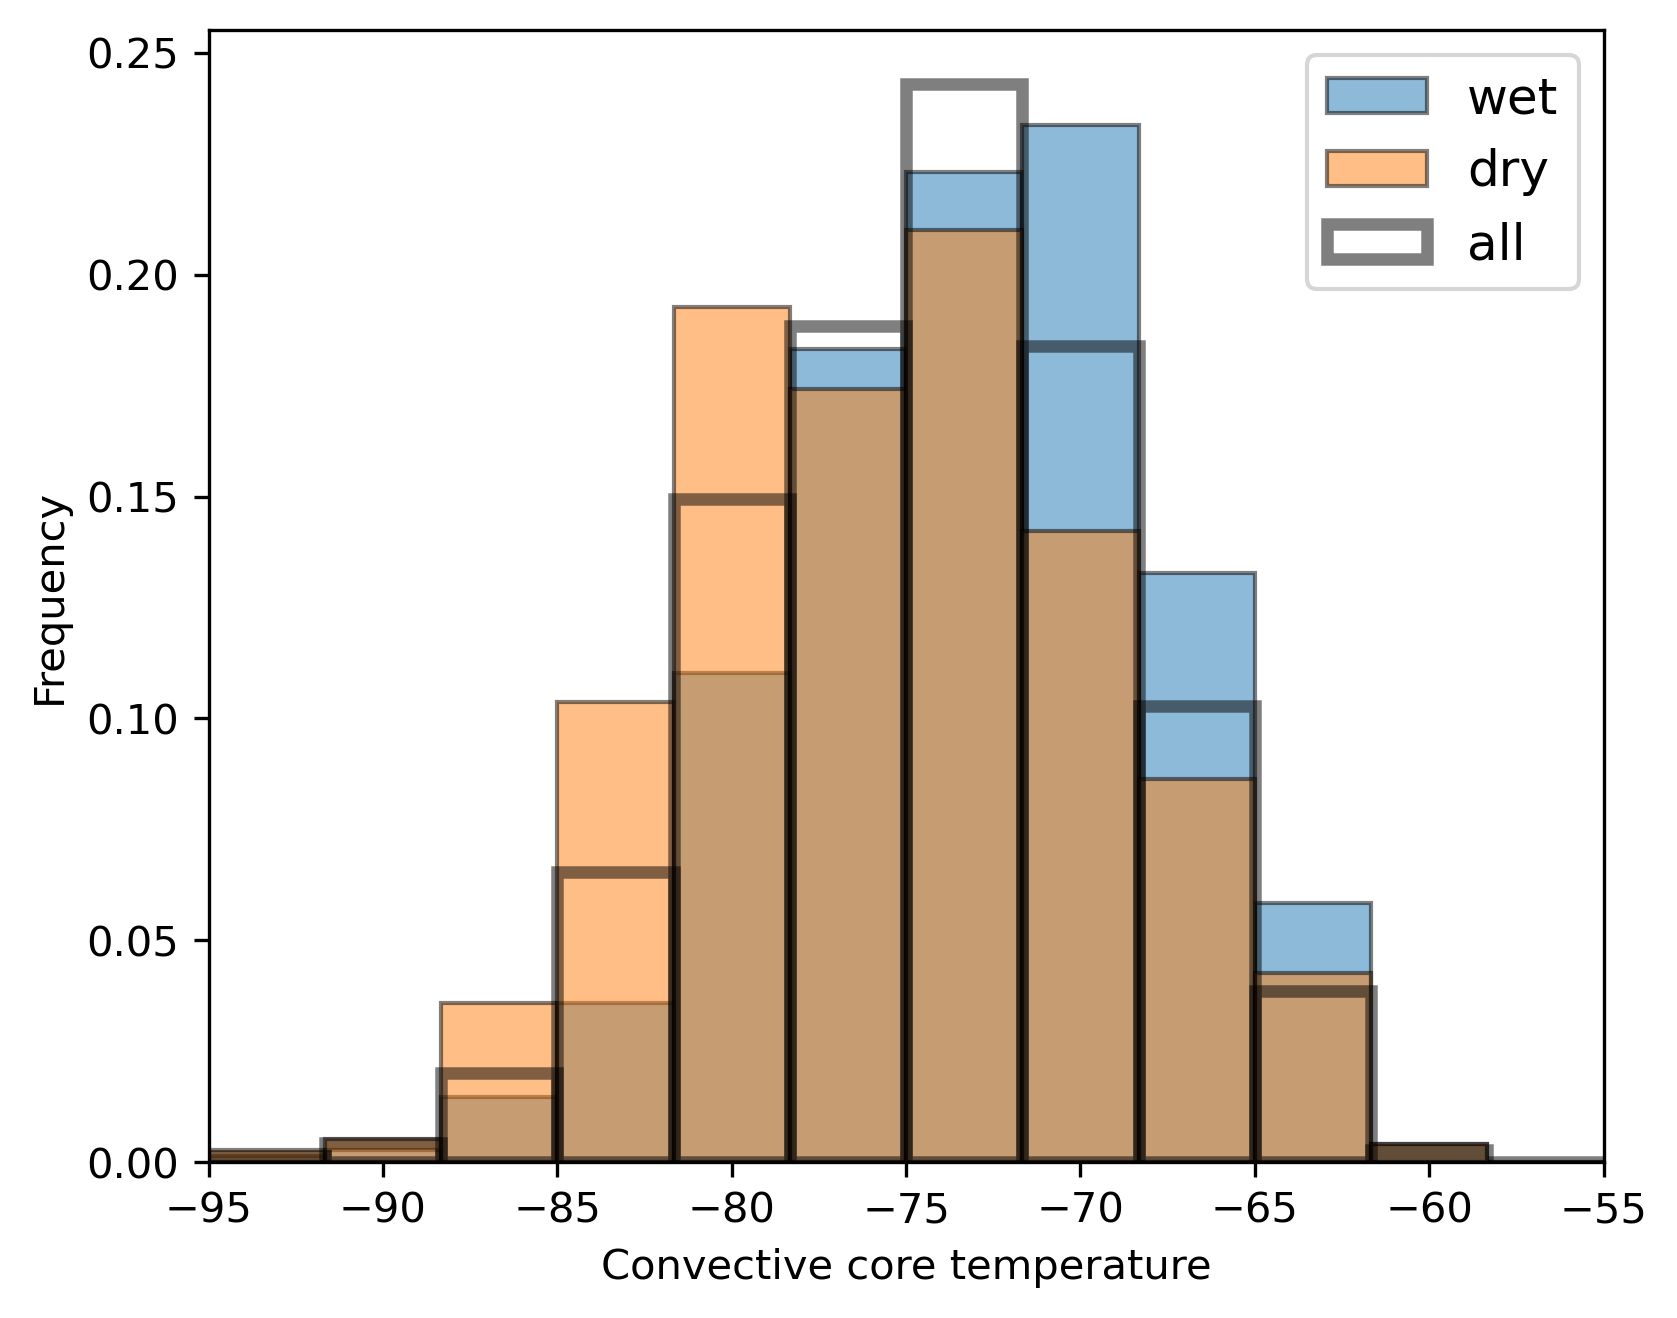

In [57]:
f= plt.figure(figsize=(6,5), dpi=300)
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wettest.t, alpha=0.5, label='wet', edgecolor='k', bins=12, range=(-95,-55))
u_plot.hist_freq(ax, drytest.t, alpha=0.5, label='dry', edgecolor='k', bins=12, range=(-95,-55))
u_plot.hist_freq(ax, qwetness.t, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=12, range=(-95,-55), facecolor='None')
plt.legend(fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Convective core temperature')
#plt.title('Full q-range')
plt.xlim(-95,-55)


text = ['a', 'b', 'c', 'd', 'e', 'f']
fs = 15
# plt.annotate(text[0], xy=(0.009, 0.91), xytext=(0, 4),xycoords=('figure fraction', 'figure fraction'),
#              textcoords='offset points', fontweight='bold', fontname='Ubuntu', fontsize=fs)

#plt.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/coreT_supps.pdf')

In [47]:
np.mean(drytest.t)-np.mean(wettest.t)

-2.4210377872231987

In [133]:
from scipy.stats import gaussian_kde
from scipy.stats import norm
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [134]:
def fit_curve_poly(x,y, order):

    z = np.polyfit(x, y, order)
    f = np.poly1d(z)

    return f

Text(0.5, 0, 'Storm area (x10$^3$km$^2$)')

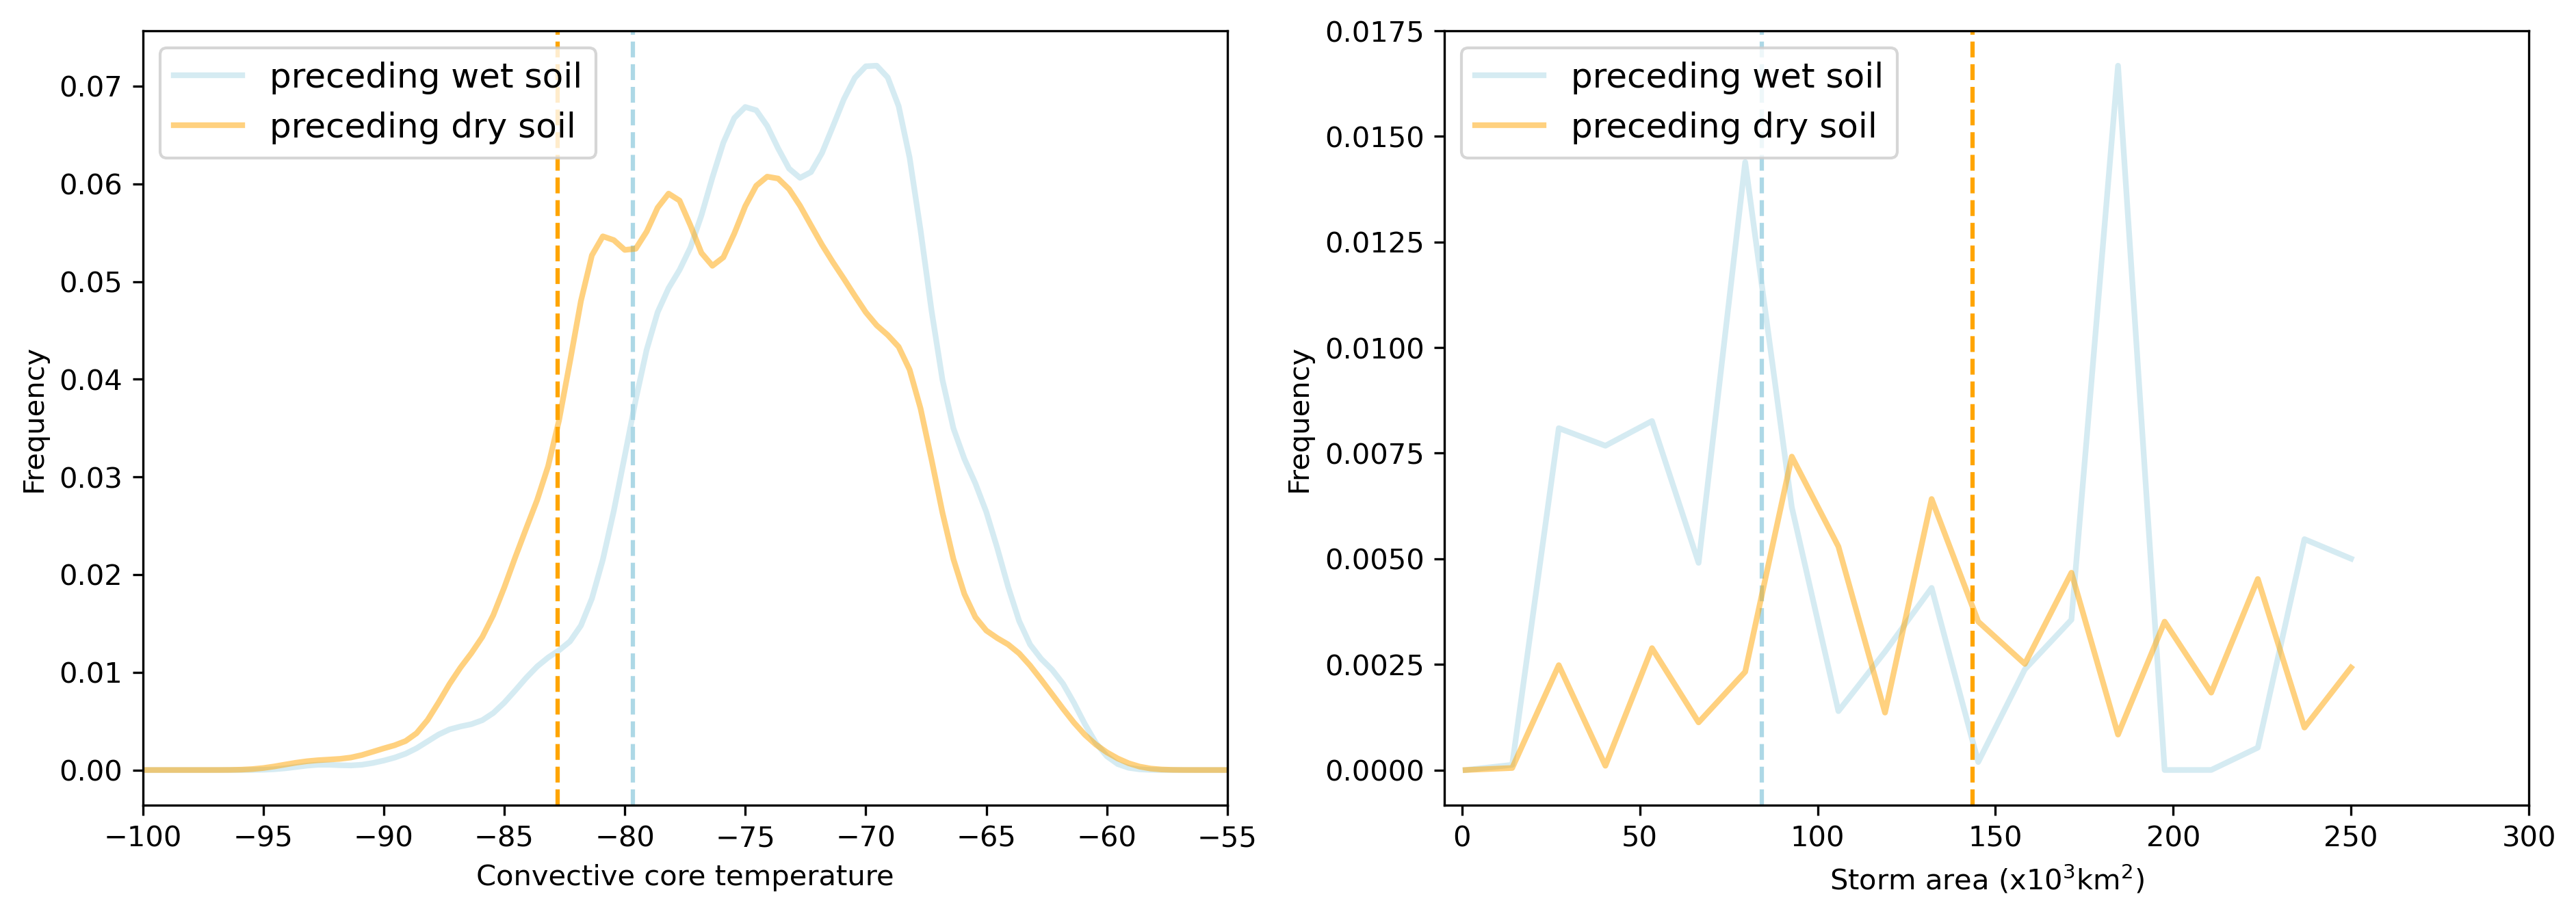

In [173]:
x_grid=np.linspace(-100,-55,100)
pdf_wet = kde_scipy(wettest.t, x_grid , bandwidth=1)
pdf_dry = kde_scipy(dry.t, x_grid , bandwidth=1)
f= plt.figure(figsize=(15,5), dpi=300)
ax = f.add_subplot(121)
ax.plot(x_grid, pdf_wet,  alpha=0.5, lw=2, label='preceding wet soil', color='lightblue')
plt.axvline(x=np.percentile(wettest.t, 10), color='lightblue', linestyle='dashed')

ax.plot(x_grid, pdf_dry,  alpha=0.5, lw=2, label='preceding dry soil', color='orange')
plt.axvline(x=np.percentile(dry.t, 10), color='orange', linestyle='dashed')
plt.legend(fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Convective core temperature')
#plt.title('Full q-range')
plt.xlim(-100,-55)

###########################

x_grid=[1,10,15,25,50,100,150, 200, 250,300,350]
x_grid=np.linspace(1,250,20)
pdf_wet = kde_scipy(wettest.area/1000, x_grid , bandwidth=1)
pdf_dry = kde_scipy(dry.area/1000, x_grid , bandwidth=1)

# fwet = fit_curve_poly(x_grid, pdf_wet, 4)
# fdry = fit_curve_poly(x_grid, pdf_dry, 4)
# # #insert new 
# x_new = np.linspace(1,200,100)
# pdf_wet = fwet(x_new)
# pdf_dry = fdry(x_new)


ax = f.add_subplot(122)
# ax.plot(x_new, pdf_wet,  alpha=0.5, lw=2, label='preceding wet soil', color='lightblue')
# plt.axvline(x=np.percentile(wettest.area/1000, 50), color='lightblue', linestyle='dashed')

# ax.plot(x_new, pdf_dry,  alpha=0.5, lw=2, label='preceding dry soil', color='orange')
# plt.axvline(x=np.percentile(dry.area/1000, 50), color='orange', linestyle='dashed')

ax.plot(x_grid, pdf_wet,  alpha=0.5, lw=2, label='preceding wet soil', color='lightblue')
plt.axvline(x=np.percentile(wettest.area/1000, 50), color='lightblue', linestyle='dashed')

ax.plot(x_grid, pdf_dry,  alpha=0.5, lw=2, label='preceding dry soil', color='orange')
plt.axvline(x=np.percentile(dry.area/1000, 50), color='orange', linestyle='dashed')
plt.xlim(-5,300)


plt.legend(fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Storm area (x10$^3$km$^2$)')
#plt.title('Full q-range')
#plt.ylim(0,0.1)

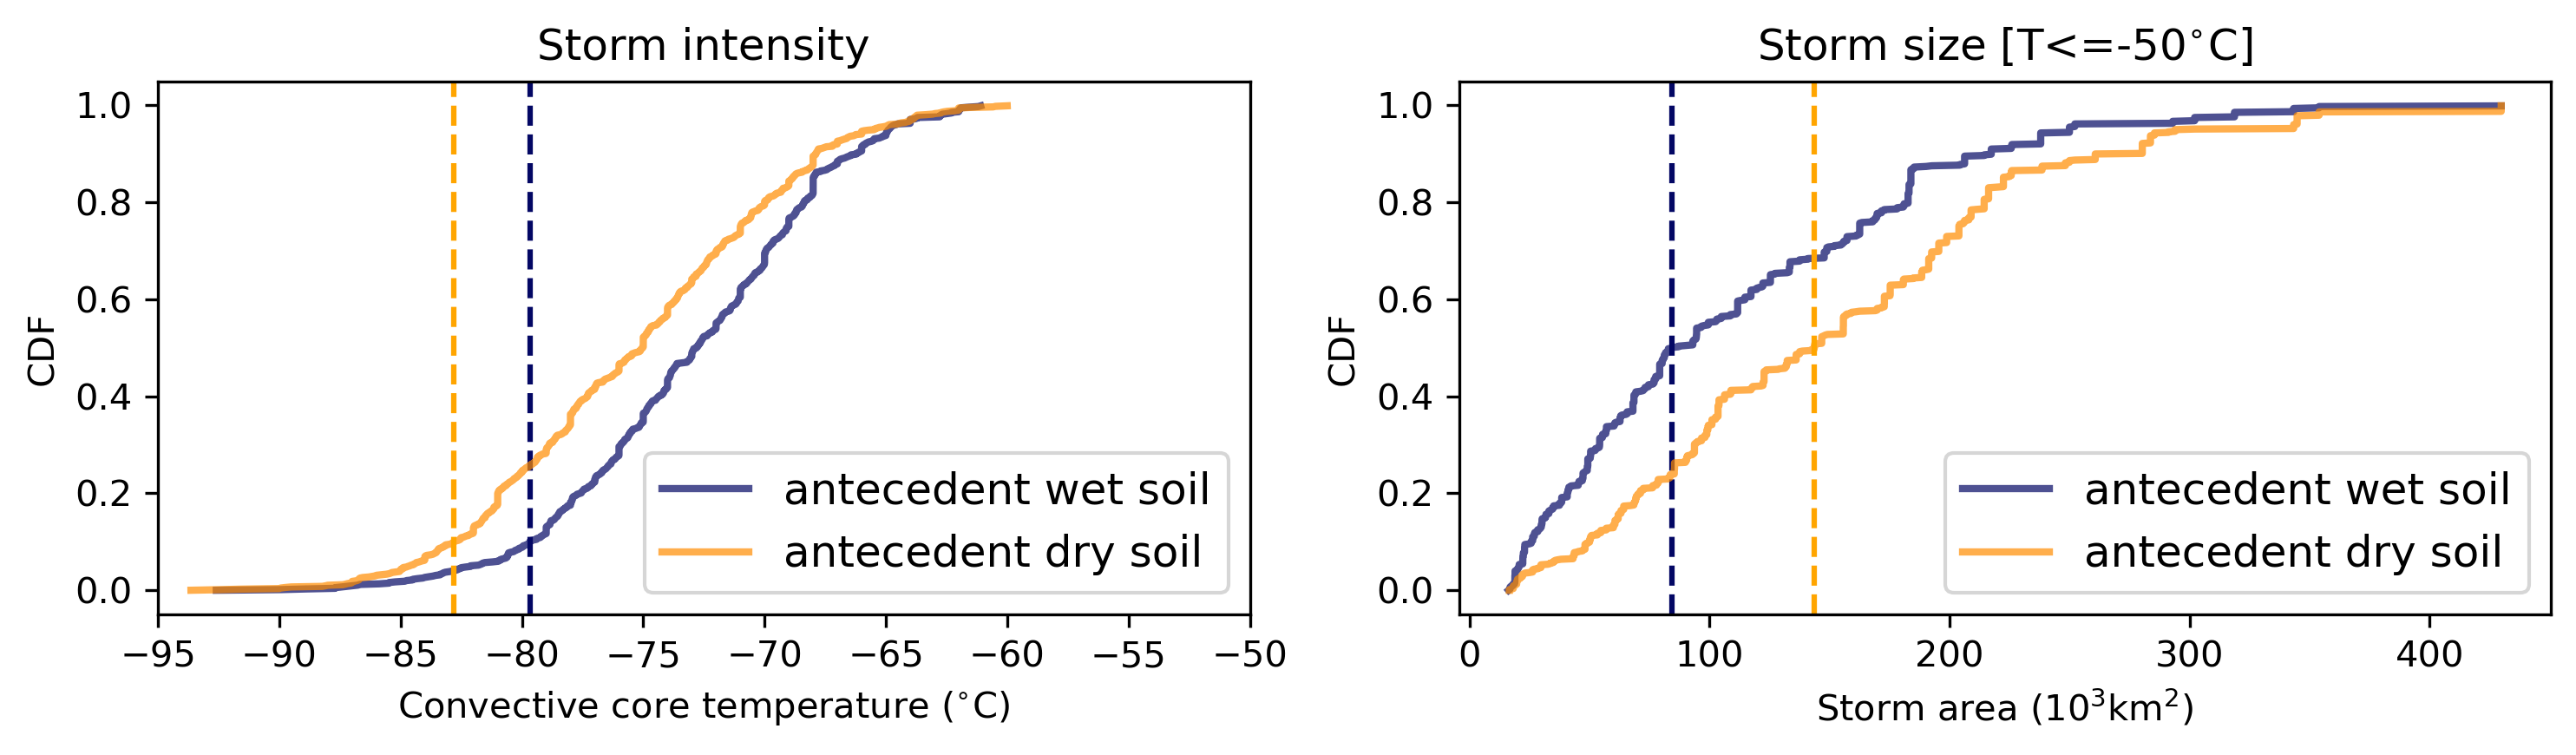

In [220]:

f= plt.figure(figsize=(10,3), dpi=300)
ax = f.add_subplot(121)
ax.plot(np.sort(wettest.t), np.arange(len(wettest.t))/len(wettest.t),  alpha=0.7, lw=2, label='antecedent wet soil', color='xkcd:darkblue')
plt.axvline(x=np.percentile(wettest.t, 10), color='xkcd:darkblue', linestyle='dashed')

ax.plot(np.sort(dry.t), np.arange(len(dry.t))/len(dry.t),  alpha=0.7, lw=2, label='antecedent dry soil', color='darkorange')
plt.axvline(x=np.percentile(dry.t, 10), color='orange', linestyle='dashed')
plt.legend(fontsize=12)
plt.ylabel('CDF')
plt.xlabel('Convective core temperature ($^{\circ}$C)')
#plt.title('Full q-range')
plt.xlim(-95,-50)
plt.title('Storm intensity')

###########################

ax = f.add_subplot(122)
ax.plot(np.sort(wettest.area/1000), np.arange(len(wettest.area))/len(wettest.area),  alpha=0.7, lw=2, label='antecedent wet soil', color='xkcd:darkblue')
plt.axvline(x=np.percentile(wettest.area/1000, 50), color='xkcd:darkblue', linestyle='dashed')

ax.plot(np.sort(dry.area/1000), np.arange(len(dry.area))/len(dry.area),  alpha=0.7, lw=2, label='antecedent dry soil', color='darkorange')
plt.axvline(x=np.percentile(dry.area/1000, 50), color='orange', linestyle='dashed')


plt.legend(fontsize=12)
plt.ylabel('CDF')
plt.xlabel('Storm area (10$^3$km$^2$)')
plt.title('Storm size [T<=-50$^{\circ}$C]')
#plt.title('Full q-range')
#plt.ylim(0,0.1)
plt.tight_layout()
plt.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/coreT_area_supps.jpg')

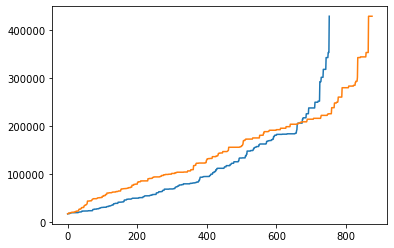

In [189]:
plt.plot(np.sort((wettest.area)))
plt.plot(np.sort((dry.area)))

Text(0.5, 0, 'Storm area (x10$^3$km$^2$)')

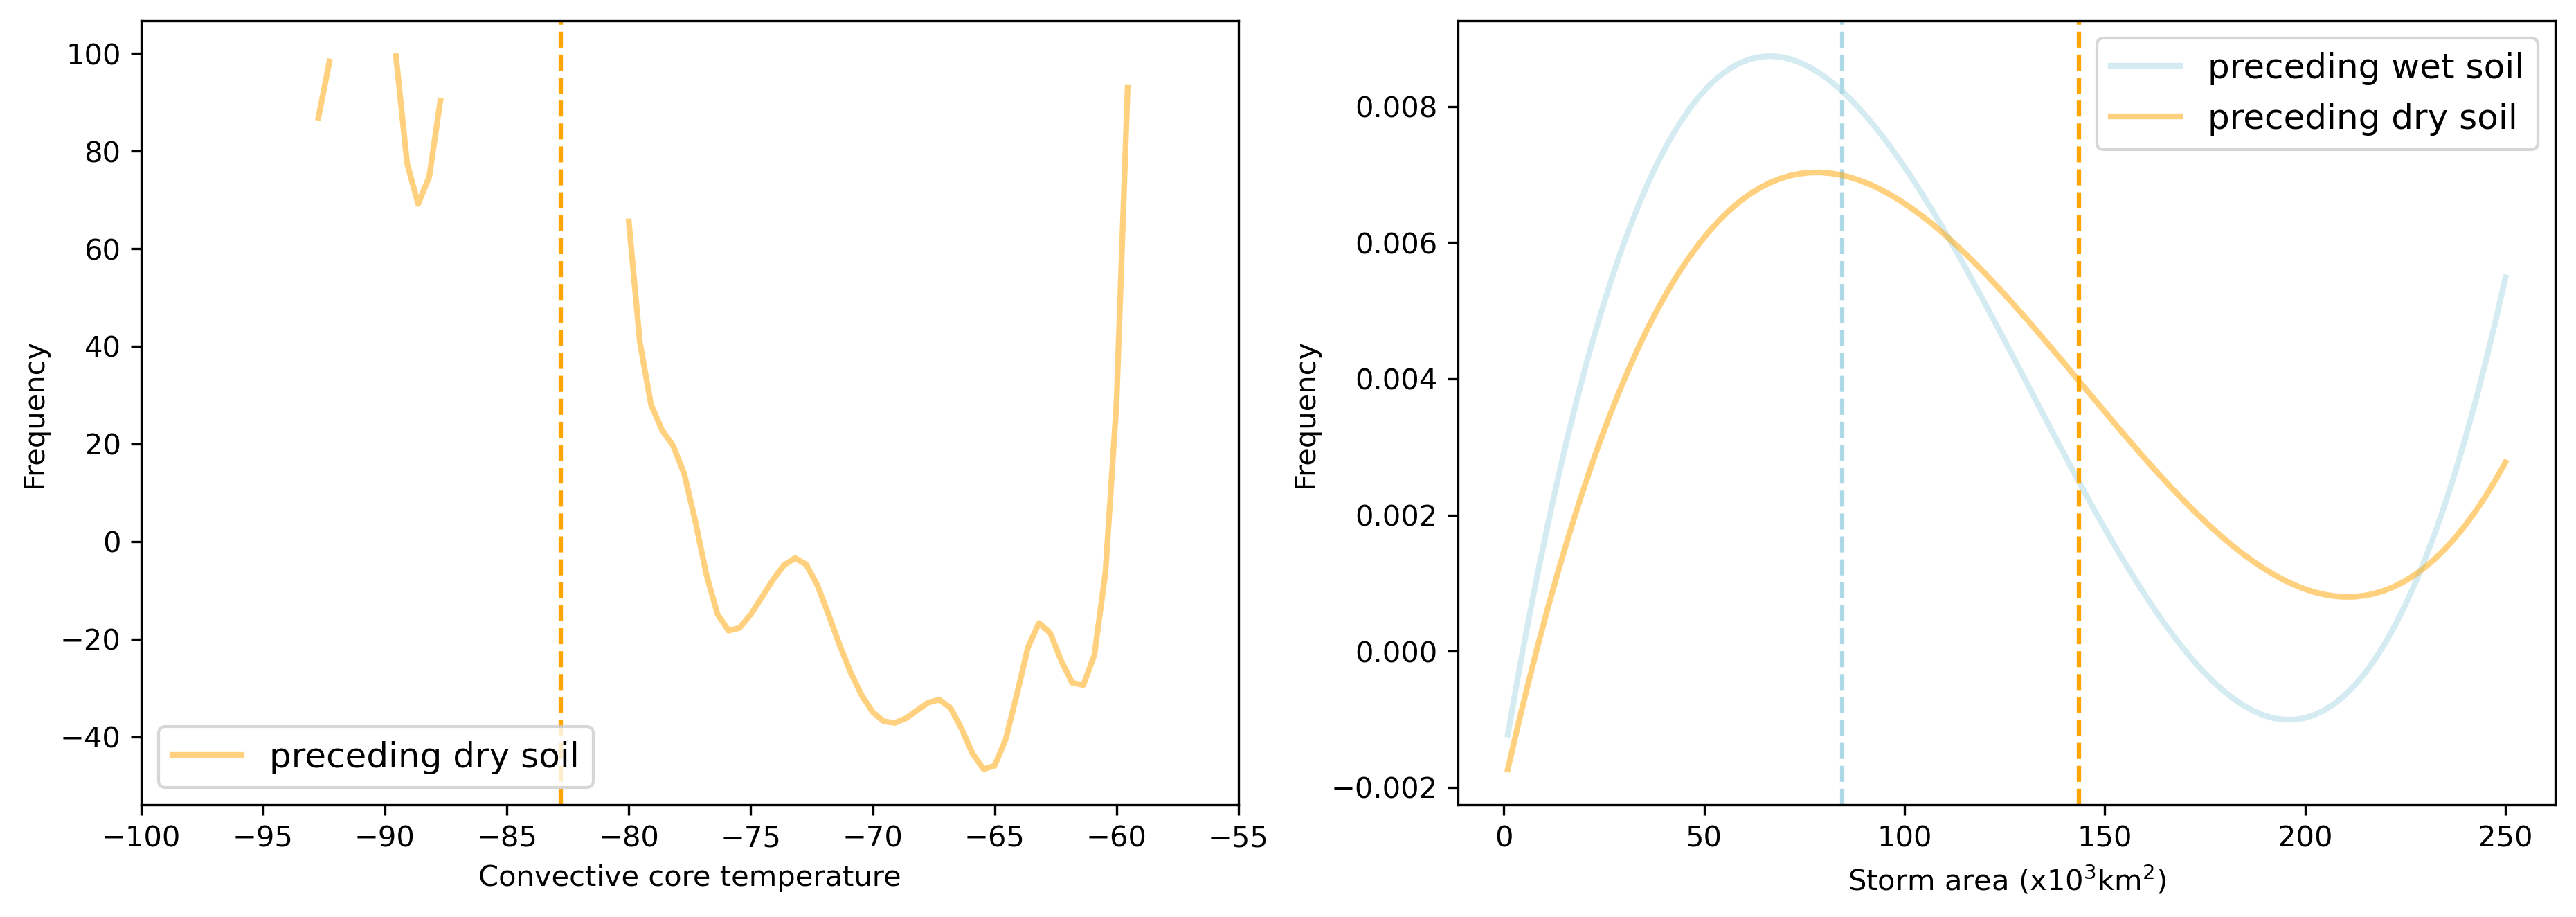

In [149]:
x_grid=np.linspace(-100,-55,100)
pdf_wet = kde_scipy(wettest.t, x_grid , bandwidth=1)
pdf_dry = kde_scipy(dry.t, x_grid , bandwidth=1)
f= plt.figure(figsize=(15,5), dpi=300)
ax = f.add_subplot(121)
# ax.plot(x_grid, pdf_wet,  alpha=0.5, lw=2, label='preceding wet soil', color='lightblue')
# plt.axvline(x=np.percentile(wettest.t, 10), color='lightblue', linestyle='dashed')
percent = (pdf_dry-pdf_wet)/pdf_wet*100
percent[percent>100]=np.nan
ax.plot(x_grid, percent,  alpha=0.5, lw=2, label='preceding dry soil', color='orange')
plt.axvline(x=np.percentile(dry.t, 10), color='orange', linestyle='dashed')
plt.legend(fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Convective core temperature')
#plt.title('Full q-range')
plt.xlim(-100,-55)

###########################

x_grid=[1,10,15,25,50,100,150, 200, 250]
bins=np.linspace(1,250,100)
pdf_wet = kde_scipy(wettest.area/1000, x_grid , bandwidth=1)
pdf_dry = kde_scipy(dry.area/1000, x_grid , bandwidth=1)

fwet = fit_curve_poly(x_grid, pdf_wet, 3)
fdry = fit_curve_poly(x_grid, pdf_dry, 3)
#insert new 
x_new = np.linspace(1,250,100)
pdf_wet = fwet(x_new)
pdf_dry = fdry(x_new)


ax = f.add_subplot(122)
ax.plot(x_new, pdf_wet,  alpha=0.5, lw=2, label='preceding wet soil', color='lightblue')
plt.axvline(x=np.percentile(wettest.area/1000, 50), color='lightblue', linestyle='dashed')

ax.plot(x_new, pdf_dry,  alpha=0.5, lw=2, label='preceding dry soil', color='orange')
plt.axvline(x=np.percentile(dry.area/1000, 50), color='orange', linestyle='dashed')
plt.legend(fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Storm area (x10$^3$km$^2$)')
#plt.title('Full q-range')
#plt.ylim(0,0.1)

In [117]:
np.sum(drytest.t<-80)/drytest.t.size

0.25

In [128]:
a, b = norm.fit(pdf_wet*100)

In [131]:
pdf_wet

array([1.15098051e-54, 1.77704287e-12, 8.04334184e-04, 5.29028097e-03,
       1.36181835e-02, 2.40482170e-03, 2.92713061e-03, 1.26765412e-07,
       5.00363834e-03])

In [132]:
norm.pdf( x_grid, a, b)

array([2.62571199e-001, 5.72682621e-120, 3.24078023e-275, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000])

In [52]:
np.sum(wettest.t<-80)/wettest.t.size

0.08897742363877822

In [54]:
(np.mean(drytest.area)-np.mean(wettest.area))/np.mean(wettest.area)

0.3891972046994399

(array([  5.,   0.,   0.,  50.,   0.,   0., 190.,   0.,   0., 129.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 10 Patch objects>)

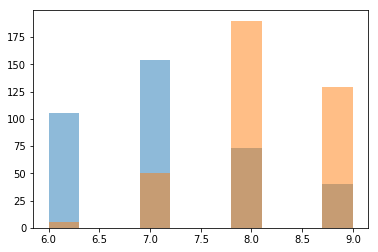

In [134]:
plt.hist(drytest['month'], alpha=0.5)
plt.hist(wettest['month'], alpha=0.5)

### We get very few wet cases in June 

Text(0.5,1,'Core frequency binned by month')

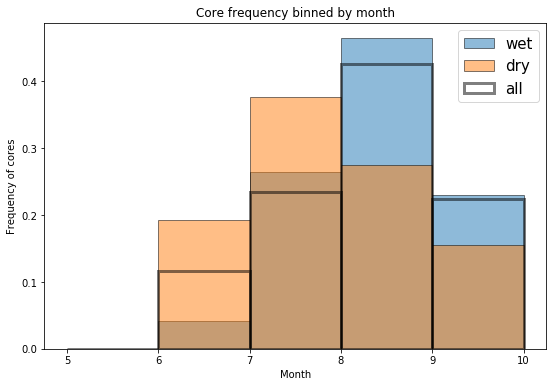

In [65]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.month, alpha=0.5, label='wet', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, dry.month, alpha=0.5, label='dry', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, msgopen.month, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=5, range=(5,10), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Month')
plt.title('Core frequency binned by month')

### The dry cases tend to occur further south - as expected from main occurence during June/July
### The wet case doesn't show such a preference

Text(0.5,1,'Core frequency binned by latitude')

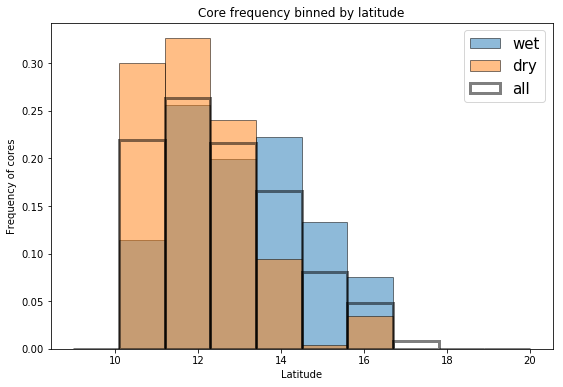

In [46]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.lat, alpha=0.5, label='wet', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, dry.lat, alpha=0.5, label='dry', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, msgopen.lat, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(9,20), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Latitude')
plt.title('Core frequency binned by latitude')

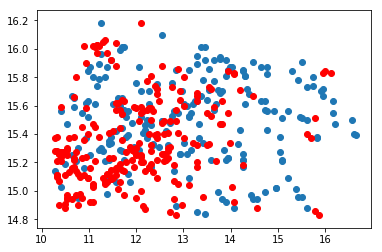

In [49]:
plt.scatter(wet.lat,wet.ERAqmean)
plt.scatter(dry.lat, dry.ERAqmean, color='r')

In [144]:
topo = xr.open_dataarray(cnst.network_data + 'data/ancils_python/lsta_corr_topo.nc')
topo = topo.sel(lat=slice(9,16))
h = topo.mean(dim='lat')

### Overall core frequency follows topography. Would have to look into dry-core case around 5W

Text(0.5,1,'Core frequency binned by longitude')

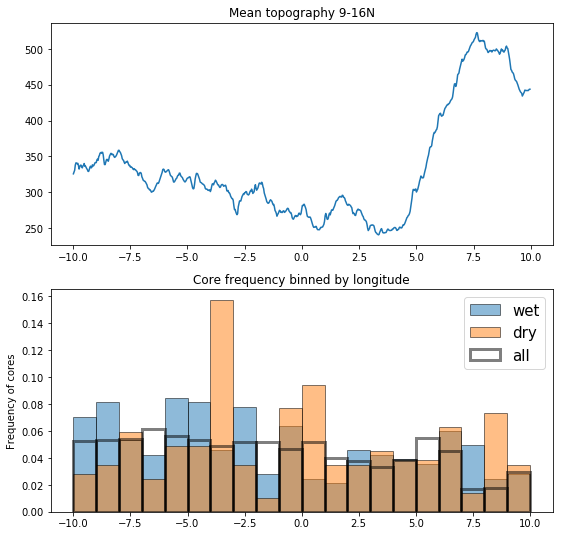

In [145]:
f= plt.figure(figsize=(9,9))

ax = f.add_subplot(211)
ax.plot(h.lon,h)
plt.title('Mean topography 9-16N')

ax = f.add_subplot(212)
u_plot.hist_freq(ax, wet.lon, alpha=0.5, label='wet', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, dry.lon, alpha=0.5, label='dry', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, msgopen.lon, alpha=0.5, label='all', edgecolor='k', linewidth=3,  bins=20, range=(-10,10), facecolor='None')
plt.legend(fontsize=15)
#ax.plot(h.lon, h)
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.title('Core frequency binned by longitude')

### Atmospheric conditions associated with the dry case favour shear and therefore organisation into bigger storms? 

Text(0.5,1,'Core frequency binned by storm area')

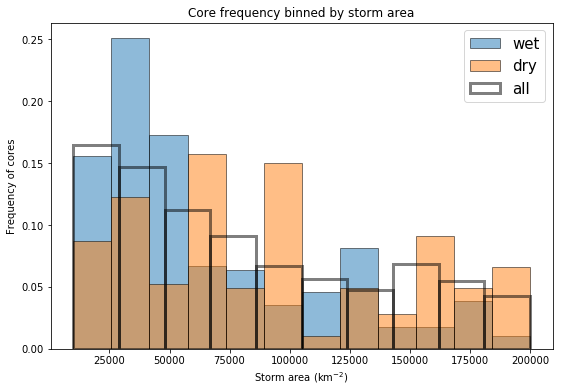

In [146]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.area, alpha=0.5, label='wet', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, dry.area, alpha=0.5, label='dry', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, msgopen.area, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(10000,200000), facecolor='None')

plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Storm area (km$^{-2}$)')
plt.title('Core frequency binned by storm area')

In [94]:
np.mean(wet.area)

75118.12749003984

In [95]:
np.mean(dry.area)

118019.9806949807

In [96]:
(np.mean(dry.area) - np.mean(wet.area)) / np.mean(wet.area)

0.5711251682974838

In [ ]:
plt.scatter